# Punto 1
## falta documentar

In [7]:
# librerias
from IPython.display import display, Math
import sympy as sp
from sympy.parsing.sympy_parser import parse_expr
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import sympy.plotting as pls
import seaborn as sns
import numpy as np
import math as mt

In [8]:
x = parse_expr('x')
funcion = parse_expr('sinc(x)')
n = 1
x0 = 0.1
error = 1
error_deseado = 10 ** -10

polinomio = funcion.subs(x, x0)

error_real = []

In [32]:
while error >= error_deseado:

  error = np.abs(np.float(funcion.subs(x, 0.2).evalf() - polinomio.subs(x, 0.2).evalf()))

  polinomio += sp.diff(funcion, x, n).subs(x, x0) * ((x - x0)**n)/(np.math.factorial(n))

  error_real.append(error)

  n = n + 1

n = n - 1 # al llegar a la última condición n fue incrementado 1 vez más de su valor real

In [30]:
derivada_n_siguiente = ((8 * x) * (x ** 6 + -42 * x ** 4 + 840 * x ** 2 -5040) * sp.cos(x) + (x ** 8 -56 * x ** 6 + 1680 * x ** 4 -20160 * x ** 2 + 40320) * sp.sin(x)) / x ** 9

In [35]:
resultado = derivada_n_siguiente.subs(x, 0.14).evalf()

In [12]:
error_teorico = [resultado / mt.factorial(n+1) for n in [1, 2, 3, 4, 5, 6, 7]]

In [13]:
error_teorico

[0.0551127626070480,
 0.0183709208690160,
 0.00459273021725400,
 0.000918546043450801,
 0.000153091007241800,
 2.18701438916857e-5,
 2.73376798646072e-6]

In [14]:
error_teorico_np = np.array([0.0551127626070480,
0.0183709208690160,
0.00459273021725400,
0.000918546043450801,
0.000153091007241800,
2.18701438916857e-5,
2.73376798646072e-6])

In [15]:
error_real 

[0.0049875124929754655,
 0.0016575113027197386,
 4.158339365845087e-06,
 8.289727436716632e-07,
 1.3863276082659581e-09,
 1.9739410106467403e-10,
 2.473576898864849e-13]

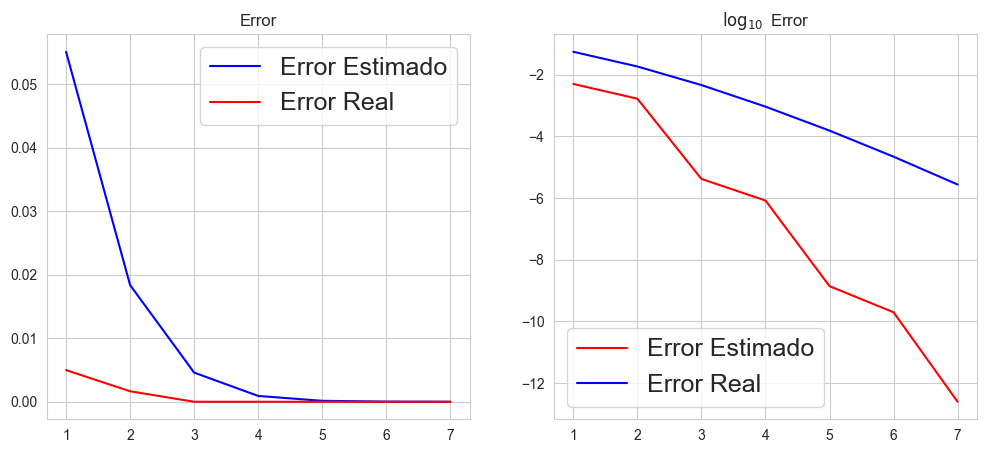

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.plot([1, 2, 3, 4, 5, 6, 7],error_teorico,color='b')
ax1.plot([1, 2, 3, 4, 5, 6, 7],error_real, color = 'r')
ax1.set_title('Error')
ax1.legend(['Error Estimado', 'Error Real'], prop={'size':18})

# try:

#   ax2.plot([1, 2, 3, 4, 5, 6, 7],np.log10(error_teorico),color='b')

# except TypeError:

#   print("algo fallo aqui")

ax2.plot([1, 2, 3, 4, 5, 6, 7],np.log10(error_real), color = 'r')
ax2.plot([1, 2, 3, 4, 5, 6, 7],np.log10(error_teorico_np),color='b')
ax2.set_title('$\log_{10}$ Error')
ax2.legend(['Error Estimado', 'Error Real'], prop={'size':18});

# Punto 2

In [64]:
import math
def prog_diff(x0, h):
    fx0 = x0 * math.log(x0)
    fxh = (x0 + h) * math.log(x0 + h)
    diff = (fxh - fx0) / h - h / (3 * x0**2)
    return diff

prog_diff(2, 1)

1.8262091715511053

In [ ]:
Para encontrar la fórmula de diferencia progresiva de primer orden para la función f(x) = xln(x) que cumpla con la condición O(h^3), podemos utilizar la definición de las diferencias divididas de Newton de primer orden:

f'(x0) ≈ f[x0, x0 + h] = (f(x0 + h) - f(x0))/h

Además, podemos utilizar la fórmula de diferencias finitas progresivas de segundo orden para aproximar la función f''(x) en x0:

f''(x0) ≈ f[x0, x0 + h, x0 + 2h] = (f(x0 + 2h) - 2f(x0 + h) + f(x0))/(h^2)

Para que la fórmula de diferencias progresivas de primer orden tenga un error O(h^3), debemos utilizar una aproximación para f''(x) que tenga un error O(h^2) y luego aplicar la fórmula de diferencias divididas de Newton. Podemos utilizar la fórmula de diferencias finitas progresivas de tercer orden para aproximar f''(x) en x0:

f''(x0) ≈ f[x0, x0 + h, x0 + 2h] = (f(x0 + 2h) - 2f(x0 + h) + f(x0))/(h^2) - (h/3)f'''(x0) + O(h^3)

Sustituyendo f(x) = xln(x), tenemos:

f'(x) = (xln(x))' = ln(x) + 1

f''(x) = (xln(x))'' = 1/x

f'''(x) = (xln(x))''' = -1/x^2

Por lo tanto, la fórmula de diferencias progresivas de primer orden con error O(h^3) para la función f(x) = xln(x) es:

f'(x0) ≈ f[x0, x0 + h] = (1/h)((x0 + h)ln(x0 + h) - x0ln(x0)) - (h/3x0^2)

Esta fórmula nos permite aproximar la derivada de xln(x) en cualquier punto x0 con un error O(h^3), siempre y cuando la función cumpla con la condición de pertenecer a la clase C^4 en el intervalo [a,b].

In [63]:
import math

def reg_diff(x0, h):
    fx0 = x0 * math.log(x0)
    fxh = (x0 - h) * math.log(x0 - h)
    diff = (fx0 - fxh) / h - h / (3 * (x0 - h)**2)
    return diff

reg_diff(2, 1)

1.0529610277865573

In [ ]:
La fórmula de diferencias regresivas de primer orden para aproximar la derivada de una función f(x) es:

f'(x0) ≈ (f(x0) - f(x0 - h)) / h

Para la función f(x) = xln(x), podemos calcular su derivada analítica:

f'(x) = ln(x) + 1

Entonces, para aproximar f'(x0) utilizando la fórmula de diferencias regresivas, podemos reemplazar f(x) por xln(x) y f'(x) por ln(x) + 1, lo que nos da:

ln(x0) + 1 ≈ (x0ln(x0) - (x0 - h)ln(x0 - h)) / h

Despejando ln(x0), obtenemos:

ln(x0) ≈ (x0ln(x0) - (x0 - h)ln(x0 - h)) / h - 1

Esta es la fórmula de diferencias regresivas de primer orden con error O(h^3) para aproximar la función f(x) = xln(x) y su derivada en cualquier punto x0 ∈ (a, b) para el cual se cumpla que f ∈ C^4 [a, b] y O(h^3).

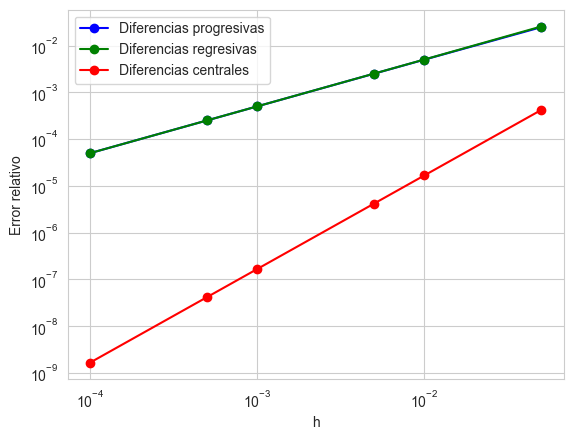

El valor de h que minimiza el error es h = 0.0001


In [70]:
import math
import matplotlib.pyplot as plt

def f(x):
    return x * math.log(x)

def f_deriv(x):
    return math.log(x) + 1

def progr_diff(x, h):
    return (f(x+h) - f(x)) / h

def regre_diff(x, h):
    return (f(x) - f(x - h)) / h

def cent_diff(x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

h_values = [0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
exact_deriv = f_deriv(1)
progr_errors = []
regre_errors = []
cent_errors = []

for h in h_values:
    progr_deriv = progr_diff(1, h)
    progr_error = abs((progr_deriv - exact_deriv) / exact_deriv)
    progr_errors.append(progr_error)
    
    regre_deriv = regre_diff(1, h)
    regre_error = abs((regre_deriv - exact_deriv) / exact_deriv)
    regre_errors.append(regre_error)
    
    cent_deriv = cent_diff(1, h)
    cent_error = abs((cent_deriv - exact_deriv) / exact_deriv)
    cent_errors.append(cent_error)

plt.plot(h_values, progr_errors, 'bo-', label='Diferencias progresivas')
plt.plot(h_values, regre_errors, 'go-', label='Diferencias regresivas')
plt.plot(h_values, cent_errors, 'ro-', label='Diferencias centrales')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('Error relativo')
plt.legend()
plt.show()

min_error_h = h_values[min(range(len(cent_errors)), key=cent_errors.__getitem__)]
print(f"El valor de h que minimiza el error es h = {min_error_h}")


# Punto 3

In [41]:
x = parse_expr('x')
f = parse_expr('sin(x)')
x0 = 0
n = 6

In [42]:
p = sp.series(expr=f, x=x, x0=x0, n=n)
display(Math(sp.latex(p)))

<IPython.core.display.Math object>

In [54]:
max_n = 6
p = [sp.series(expr=f, x=x, x0=x0, n=ni).removeO() for ni in range(2, max_n)]
p_latex = [sp.latex(pol) for pol in p]
distLatex = [display(Math(q)) for q in p_latex]
n_pol = len(p)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

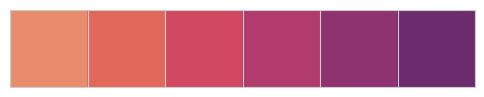

In [48]:
sns.set_style('whitegrid')
cmap = sns.color_palette('flare')
sns.palplot(cmap)

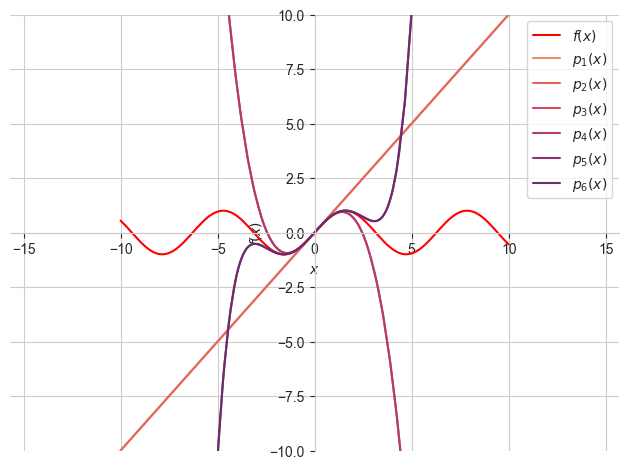

In [22]:
fig = pls.plot(f,xlim=[(-5*3.14),(5*3.14)],ylim=[-10, 10], line_color='r', show=False)
labs = ['$f(x)$']
for n in range(n_pol):
  c = cmap[n]
  labs.append(f'$p_{n+1}(x)$')
  fig.extend(pls.plot(p[n],xlim=[(-5*3.14),(5*3.14)],ylim=[-10,10], line_color=c, show=False))
for n in range(n_pol+1): fig[n].label = labs[n]
fig.legend = True
fig.show()

In [23]:
import numpy as np
import math as mat

In [24]:
x = parse_expr('x')
f = parse_expr('sinc(x)')
x0 = 0
n = 1

In [25]:
p = sp.series(expr=f, x=x, x0=x0, n=n)
display(Math(sp.latex(p)))

<IPython.core.display.Math object>

In [26]:
max_n = 12
p = [sp.series(expr=f, x=x, x0=x0, n=ni).removeO() for ni in range(2, max_n)]
p_latex = [sp.latex(pol) for pol in p]
distLatex = [display(Math(q)) for q in p_latex]
n_pol = len(p)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>